In [3]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

# Set up MySQL connection
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Suku@#0508',
    database='infrasense_ai'
)



In [4]:
# Load server logs
server_logs = pd.read_sql("SELECT * FROM server_logs", conn)
helpdesk = pd.read_sql("SELECT * FROM helpdesk_tickets", conn)
cost_report = pd.read_sql("SELECT * FROM cost_report", conn)

# Preview
server_logs.head(), helpdesk.head(), cost_report.head()


C:\Users\shash\AppData\Local\Temp\ipykernel_13948\4067100608.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  server_logs = pd.read_sql("SELECT * FROM server_logs", conn)
C:\Users\shash\AppData\Local\Temp\ipykernel_13948\4067100608.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  helpdesk = pd.read_sql("SELECT * FROM helpdesk_tickets", conn)
C:\Users\shash\AppData\Local\Temp\ipykernel_13948\4067100608.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cost_report = pd.read_sql("SELECT * FROM cost_report", conn)


(  server_id           timestamp  cpu_usage  ram_usage  disk_io  net_usage
 0   srv_001 2024-06-01 00:00:00      11.19      44.48     7.37      45.95
 1   srv_001 2024-06-01 01:00:00      59.21      41.35    17.08      61.54
 2   srv_001 2024-06-01 02:00:00      56.28      69.24    10.94      86.89
 3   srv_001 2024-06-01 03:00:00      13.95      52.89    16.19      47.93
 4   srv_001 2024-06-01 04:00:00      17.09      63.30    15.32      94.46,
    ticket_id           timestamp                      issue department  \
 0      10001 2024-06-01 16:47:00               System crash         IT   
 1      10002 2024-06-01 04:26:00  Software install required      Sales   
 2      10003 2024-06-01 12:23:00               System crash      Sales   
 3      10004 2024-06-01 09:30:00            VPN not working         IT   
 4      10005 2024-06-01 14:43:00               System crash      Sales   
 
   priority resolved  
 0     High      Yes  
 1     High      Yes  
 2   Medium      Yes  
 3   

In [5]:
# Convert timestamps
server_logs['timestamp'] = pd.to_datetime(server_logs['timestamp'])
helpdesk['timestamp'] = pd.to_datetime(helpdesk['timestamp'])

# Ensure 'resolved' column is consistent
helpdesk['resolved'] = helpdesk['resolved'].str.lower().map({'yes': 1, 'no': 0})


C:\Users\shash\AppData\Local\Temp\ipykernel_13948\234917194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_servers.index, y=top_servers.values, palette='viridis')


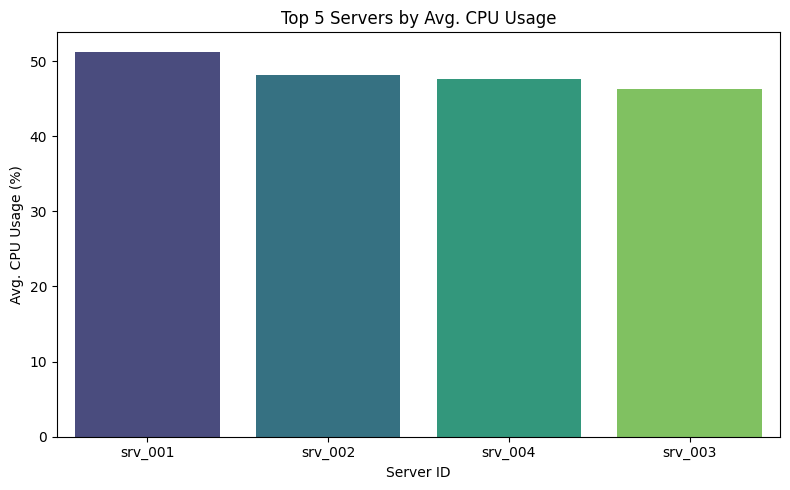

In [6]:
top_servers = server_logs.groupby('server_id')['cpu_usage'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))
sns.barplot(x=top_servers.index, y=top_servers.values, palette='viridis')
plt.title('Top 5 Servers by Avg. CPU Usage')
plt.ylabel('Avg. CPU Usage (%)')
plt.xlabel('Server ID')
plt.tight_layout()
plt.show()


C:\Users\shash\AppData\Local\Temp\ipykernel_13948\2069465859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_dept.values, y=issue_dept.index, palette='magma')


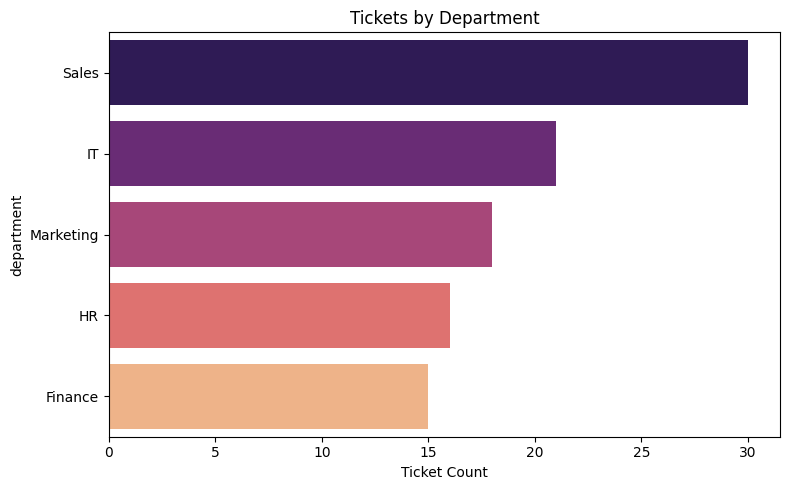

In [7]:
issue_dept = helpdesk.groupby('department')['ticket_id'].count().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=issue_dept.values, y=issue_dept.index, palette='magma')
plt.title('Tickets by Department')
plt.xlabel('Ticket Count')
plt.tight_layout()
plt.show()


C:\Users\shash\AppData\Local\Temp\ipykernel_13948\2069465859.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_dept.values, y=issue_dept.index, palette='magma')


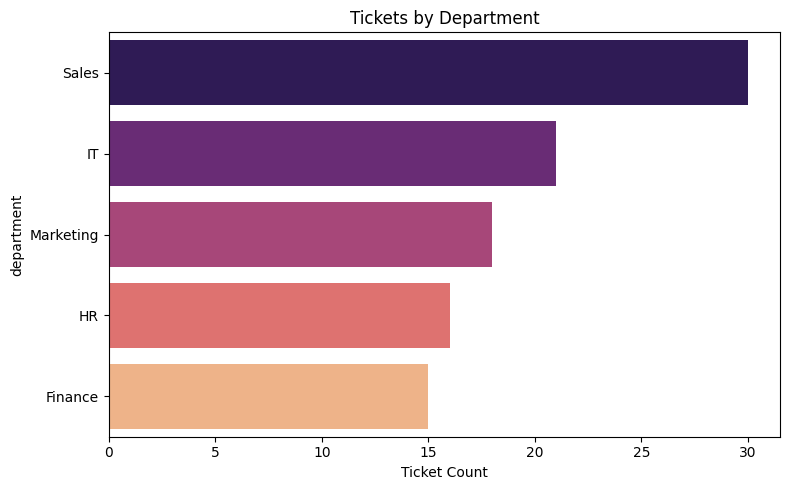

In [8]:
issue_dept = helpdesk.groupby('department')['ticket_id'].count().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=issue_dept.values, y=issue_dept.index, palette='magma')
plt.title('Tickets by Department')
plt.xlabel('Ticket Count')
plt.tight_layout()
plt.show()


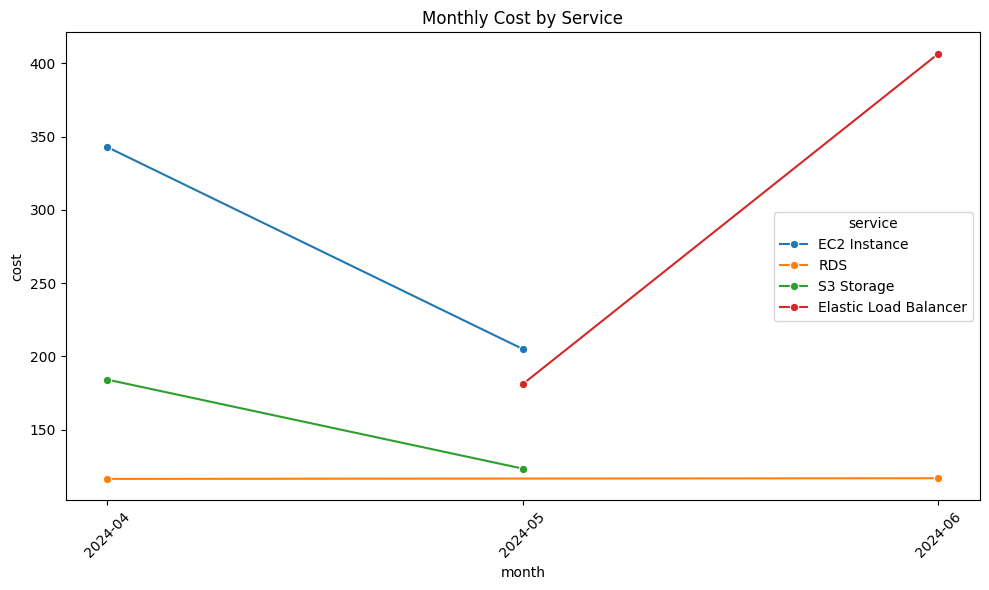

In [9]:
monthly_costs = cost_report.groupby(['month', 'service'])['cost'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_costs, x='month', y='cost', hue='service', marker='o')
plt.title('Monthly Cost by Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
high_cpu = server_logs[server_logs['cpu_usage'] > 85]
high_ram = server_logs[server_logs['ram_usage'] > 90]

print("⚠️ High CPU usage entries:", len(high_cpu))
print("⚠️ High RAM usage entries:", len(high_ram))


⚠️ High CPU usage entries: 27
⚠️ High RAM usage entries: 36
